# Analyze Medical Costs Using Regression Tools


### Author: Cera Drake
### Data: 04/20/2025
### Objective: We have a data set of medical costs for individuals. Using different tools, I am going to see if there is any correlation between certain personal factors and higher medical costs

### Section 1: Import and Inspect Data

In [251]:
#Display first 10 rows
import pandas as pd
df = pd.read_csv("insurance.csv")
df.info()
print('The first five 10 rows of the dataset:')
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
The first five 10 rows of the dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [252]:
# Inspect data - Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [253]:
# Display the summary statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### Reflection: This data set contains no missing values. However, the max charge is a lot higher than the mean, which means the data could be right skewed. This could affect the different models that I will use. 

### Section 2.1 Explore Data Patterns and Distributions

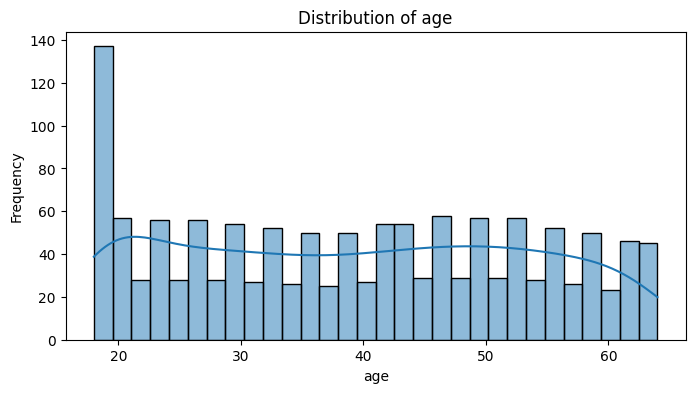

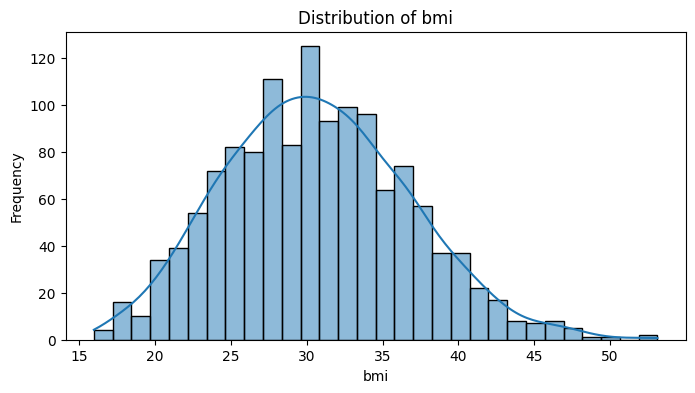

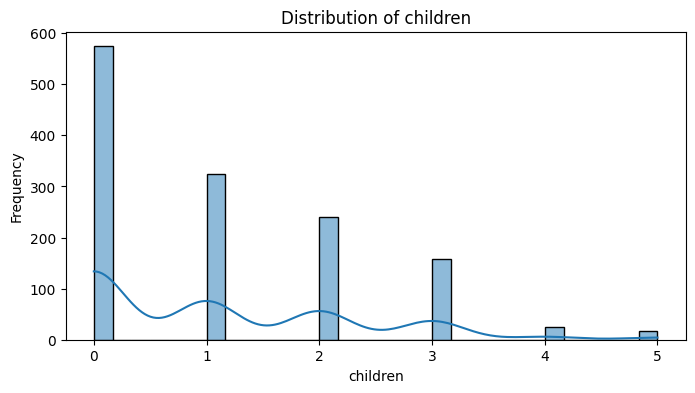

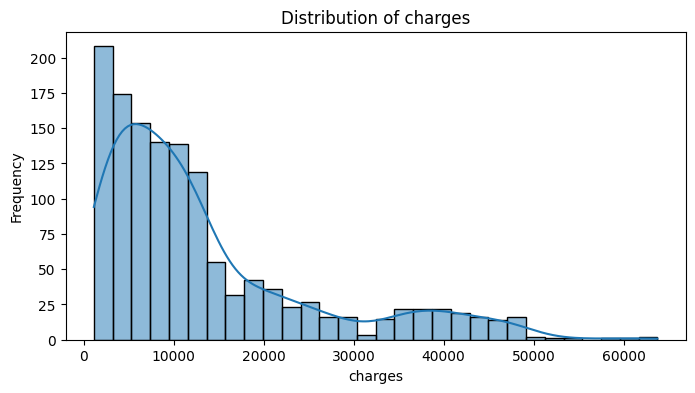

In [254]:
# Create histogram for the numerical data
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['age', 'bmi', 'children', 'charges']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.title(f'Distribution of {col}')
    sns.histplot(df[col], kde=True, bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

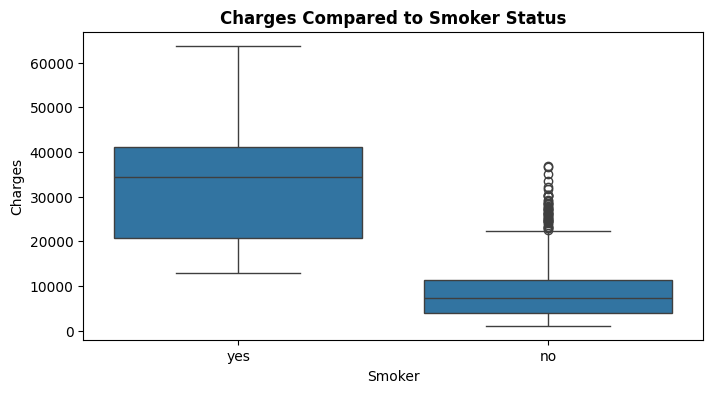

In [255]:
# Create a boxplot to look at smoker status and charges
plt.figure(figsize=(8, 4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges Compared to Smoker Status', fontweight = 'bold')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

##### My target variable is going to be charges, so I will not be looking for a class imbalance. Rather, I will look for outliers or skew.

##### 2.2 Handle missing values and clean data
- Impute or drop missing values (as applicable).
- Remove or transform outliers (as applicable).
- Convert categorical data to numerical format using encoding (as applicable).

In [256]:
# Transform the outliers in the charges column 
import numpy as np

df['log_charges'] = np.log(df['charges'])

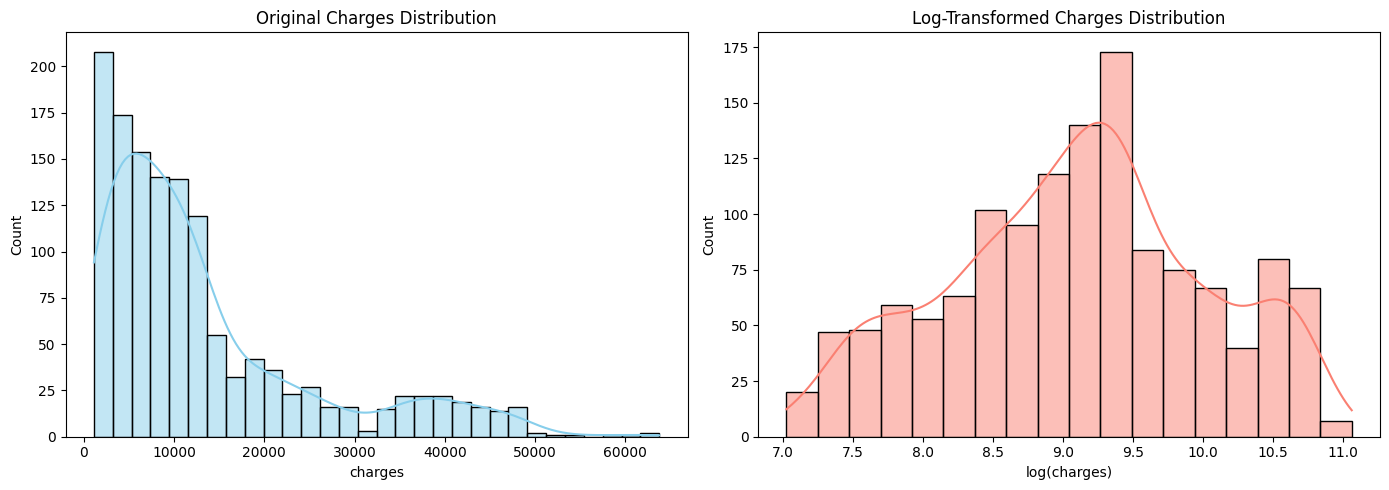

In [257]:
# Compare the visualization from before and after we transformed the outliers
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original distribution
sns.histplot(df['charges'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Original Charges Distribution')
axes[0].set_xlabel('charges')

# Log-transformed distribution
sns.histplot(df['log_charges'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Log-Transformed Charges Distribution')
axes[1].set_xlabel('log(charges)')

plt.tight_layout()
plt.show()

In [258]:
# Convert categorical data to numerical data 
from sklearn.preprocessing import LabelEncoder

df_label_encoded = df.copy()
label_cols = ['sex', 'smoker', 'region']

# 0 = no, 1 = yes

le = LabelEncoder()
for col in label_cols:
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])
df_label_encoded.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0,27.900,0,1,3,16884.92400,9.734176
1,18,1,33.770,1,0,2,1725.55230,7.453302
2,28,1,33.000,3,0,2,4449.46200,8.400538
3,33,1,22.705,0,0,1,21984.47061,9.998092
4,32,1,28.880,0,0,1,3866.85520,8.260197


##### 2.3 Create New Features

In [259]:
# Create a category that gives labels to the BMI numbers
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, float('inf')],
                            labels=['underweight', 'normal', 'overweight', 'obese'])

##### Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?
- I created a feature that will give a label to the BMI numbers so that it might be easier to understand the meaning behind the numbers
- There were some extreme outliers in the charges, so it was right skewed. I transformed the outliers so it wasn't as extreme and did not have as big of an effect on the models that we will use. 
- There seems to be a big correlation between smoker status and charges. 
- There also appears to be some correlation between BMI and charges.

##### 3.1 Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Select a target variable (as applicable) - Charges
- Regression: Continuous target variable (e.g., price, temperature). Charges
- Classification: Categorical target variable (e.g., gender, species). Smoker Status 
- Clustering: No target variable.
- Justify your selection with reasoning. 

##### 3.2 Define X and y - For Regression 
- Assign input features to X - Age, BMI, sex, smoker
- Assign target variable to y (as applicable) - Charges
##### 3.2 X and y - For Classification
- X - Age, BMI, Sex
- y - Smoker

##### Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?
- For the regression analysis, all of the X features might play a role in predicting charges. I want to see if BMI and smoker status correlate with higher charges. 
- For classification analysis, I chose these features out of curiosity to see if there was any correlation to smoker status.


##### 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).

In [260]:
from sklearn.model_selection import train_test_split
X = df_label_encoded[['age', 'bmi', 'sex', 'smoker']]
y = df_label_encoded['log_charges']  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     
    random_state=42     
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1070, 4) (268, 4)
(1070,) (268,)


##### 4.2 Train model using Scikit-Learn model.fit() method

In [261]:
from sklearn.linear_model import LinearRegression

lr_model1 = LinearRegression().fit(X_train, y_train)

##### 4.3 Evalulate performance

In [262]:
# Predictions
y_pred_train1 = lr_model1.predict(X_train)
y_pred_test1 = lr_model1.predict(X_test)

In [263]:
#Report Performance - Linear Regression
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Case 1: Training R²:", r2_score(y_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y_test, y_pred_test1))
print("Case 1: Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test1)))
print("Case 1: Test MAE:", mean_absolute_error(y_test, y_pred_test1))

Case 1: Training R²: 0.7384693949624483
Case 1: Test R²: 0.7722067170185349
Case 1: Test RMSE: 0.45256845187894384
Case 1: Test MAE: 0.2991164776262657


##### Repeat the above steps for my classification features

In [264]:
# 4.1 Split the data into training and test sets using train_test_split
X1 = df_label_encoded[['age', 'bmi', 'sex']]
y1 = df_label_encoded['smoker']
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1,
    test_size=0.2,
    random_state=42 
)


In [265]:
# 4.2 Train model using Scikit-Learn model.fit() method
from sklearn.linear_model import LogisticRegression

clf_model = LogisticRegression().fit(X1_train, y1_train)
y_pred = clf_model.predict(X1_test)


In [266]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [267]:
# 4.3 Evalulate performance
print("Accuracy:", accuracy_score(y1_test, y_pred))
print("Precision:", precision_score(y1_test, y_pred))
print("Recall:", recall_score(y1_test, y_pred))
print("F1 Score:", f1_score(y1_test, y_pred))

Accuracy: 0.7985074626865671
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\cerad\OneDrive\Desktop\Machine Learning\ml_regression_drake\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


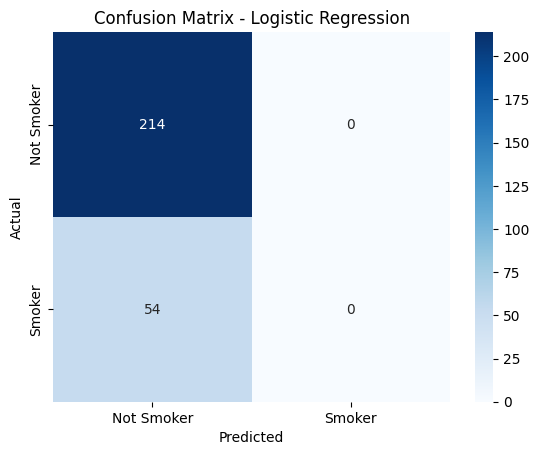

In [268]:
# Confusion Matrix
cm = confusion_matrix(y1_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Smoker', 'Smoker'], 
            yticklabels=['Not Smoker', 'Smoker'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [269]:
# Accuracy Score
accuracy = accuracy_score(y1_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 79.85%


##### Reflection 4: How well did the model perform? Any surprises in the results?
- When predicting charges, the features I picked did a good job of correlating to that. The RMSE and MAE are low. There was no major overfitting or underfitting. My first model did a good job. 
- Although the accuracy is almost 80%, my second model did not perform well. I think there was a class imbalance. It did not correctly predict any smokers. 

##### Section 5. Improve the Model or Try Alternates (Implement Pipelines)


In [270]:
# 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the pipeline
pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),      
    ('scaler', StandardScaler()),                     
    ('model', LinearRegression())                     
])

# Fit the pipeline on the training data
pipeline1.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline1.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")


Test RMSE: 0.4526
Test MAE: 0.2991
Test R²: 0.7722


In [271]:
5.2 # Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.
pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Fit the pipeline on the training data
pipeline2.fit(X_train, y_train)

# Predict on the test set
y_pred2 = pipeline2.predict(X_test)

# Evaluate the model
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
mae2 = mean_absolute_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print(f"Pipeline 2 - Test RMSE: {rmse2:.4f}")
print(f"Pipeline 2 - Test MAE: {mae2:.4f}")
print(f"Pipeline 2 - Test R²: {r2_2:.4f}")


Pipeline 2 - Test RMSE: 0.3883
Pipeline 2 - Test MAE: 0.2320
Pipeline 2 - Test R²: 0.8323


##### Reflection: Polynomial regression with a degree of 3 performed better in all aspects. 
- pipeline 1 was easier to interpret, but it did not catch the non linear patterns. 
- pipeline 2 caught the non linear relationships, based on the lower RMSE and MAE scores. 

##### 6.1 Summarize findings.
- 6.2 Discuss challenges faced. - I faced challenges with a class imbalance when running the model for my classification features
- 6.3 If you had more time, what would you try next? I would run more models for the classification features to see if smoker status could be predicted and compare the results
- Reflection 6: What did you learn from this project? I learned that there is a correlation between smoking and health care costs. This data set showed me that there are a lot of features that could be used and there are a lot of different ways that you can use given data to make predictions. There were many things that could be used and many different end results that could be found using this data set. 